In [5]:
!pip install prophet pandas matplotlib


In [6]:
import pandas as pd

# Example transaction data
transactions = [
    {"date": "2025-08-01", "amount": 2000, "type": "income"},
    {"date": "2025-08-02", "amount": -50, "type": "expense"},
    {"date": "2025-08-02", "amount": -30, "type": "expense"},
    {"date": "2025-08-03", "amount": -120, "type": "expense"},
]

df = pd.DataFrame(transactions)

# Aggregate daily net
daily = df.groupby("date")["amount"].sum().reset_index()
daily.columns = ["ds", "y"]  # Prophet format
daily["ds"] = pd.to_datetime(daily["ds"])

print(daily)


          ds     y
0 2025-08-01  2000
1 2025-08-02   -80
2 2025-08-03  -120


23:41:15 - cmdstanpy - INFO - Chain [1] start processing
23:41:15 - cmdstanpy - INFO - Chain [1] done processing


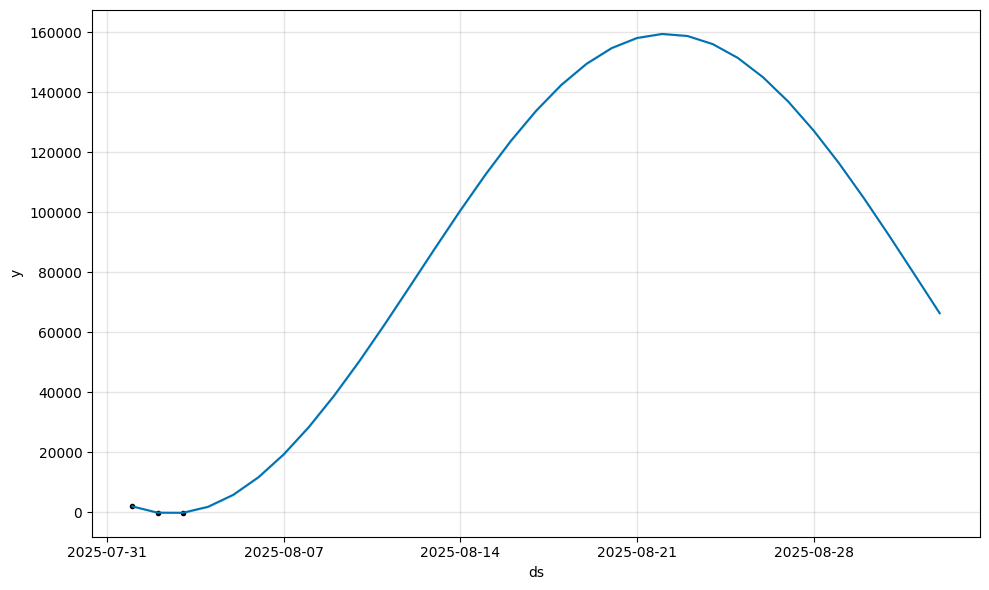

In [7]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Initialize model
m = Prophet(daily_seasonality=True, yearly_seasonality=True)
m.fit(daily)

# Predict next 30 days
future = m.make_future_dataframe(periods=30)  # forecast 30 days ahead
forecast = m.predict(future)

# Plot
fig = m.plot(forecast)
plt.show()


In [8]:
# Starting balance
current_balance = 1500  

forecast["balance"] = current_balance + forecast["yhat"].cumsum()

# Find when balance goes negative
runout = forecast[forecast["balance"] <= 0].head(1)

if not runout.empty:
    print("Estimated run out date:", runout["ds"].values[0])
else:
    print("Balance stays positive in forecast horizon")


Balance stays positive in forecast horizon


In [15]:
import pandas as pd

# Example transaction data
transactions = [
    {"date": "2025-07-30", "amount": 2000, "type": "income"},
    {"date": "2025-07-31", "amount": -50, "type": "expense"},
    {"date": "2025-07-31", "amount": -30, "type": "expense"},
    {"date": "2025-08-01", "amount": -120, "type": "expense"},

    {"date": "2025-07-30", "amount": 2000, "type": "income"},
    {"date": "2025-07-31", "amount": -50, "type": "expense"},
    {"date": "2025-07-31", "amount": -30, "type": "expense"},
    {"date": "2025-08-01", "amount": -120, "type": "expense"},
    
    {"date": "2025-08-02", "amount": -50, "type": "expense"},
    {"date": "2025-08-02", "amount": -30, "type": "expense"},
    {"date": "2025-08-03", "amount": -200, "type": "expense"},
    {"date": "2025-08-04", "amount": -50, "type": "expense"},
    {"date": "2025-08-04", "amount": -30, "type": "expense"},
    {"date": "2025-08-05", "amount": -120, "type": "expense"},
    
    {"date": "2025-08-06", "amount": -50, "type": "expense"},
    {"date": "2025-08-06", "amount": -30, "type": "expense"},
    {"date": "2025-08-07", "amount": -200, "type": "expense"},
    {"date": "2025-08-08", "amount": -50, "type": "expense"},
    {"date": "2025-08-08", "amount": -30, "type": "expense"},
    {"date": "2025-08-09", "amount": -120, "type": "expense"},
    
    {"date": "2025-08-10", "amount": -50, "type": "expense"},
    {"date": "2025-08-10", "amount": -30, "type": "expense"},
    {"date": "2025-08-11", "amount": -200, "type": "expense"},
    {"date": "2025-08-12", "amount": -50, "type": "expense"},
    {"date": "2025-08-12", "amount": -30, "type": "expense"},
    {"date": "2025-08-13", "amount": -120, "type": "expense"},

    {"date": "2025-08-14", "amount": -50, "type": "expense"},
    {"date": "2025-08-14", "amount": -30, "type": "expense"},
    {"date": "2025-08-15", "amount": 2000, "type": "income"},
    {"date": "2025-08-15", "amount": -200, "type": "expense"},
    {"date": "2025-08-16", "amount": -50, "type": "expense"},
    {"date": "2025-08-16", "amount": -30, "type": "expense"},
    {"date": "2025-08-17", "amount": -120, "type": "expense"},

    {"date": "2025-08-18", "amount": -50, "type": "expense"},
    {"date": "2025-08-18", "amount": -30, "type": "expense"},
    {"date": "2025-08-19", "amount": -200, "type": "expense"},
    {"date": "2025-08-20", "amount": -50, "type": "expense"},
    {"date": "2025-08-20", "amount": -30, "type": "expense"},
    {"date": "2025-08-21", "amount": -120, "type": "expense"},

    {"date": "2025-08-22", "amount": -50, "type": "expense"},
    {"date": "2025-08-22", "amount": -30, "type": "expense"},
    {"date": "2025-08-23", "amount": -200, "type": "expense"},
    {"date": "2025-08-24", "amount": -50, "type": "expense"},
    {"date": "2025-08-24", "amount": -30, "type": "expense"},
    {"date": "2025-08-25", "amount": -120, "type": "expense"},

    {"date": "2025-08-26", "amount": -50, "type": "expense"},
    {"date": "2025-08-26", "amount": -30, "type": "expense"},
    {"date": "2025-08-27", "amount": -200, "type": "expense"},
    {"date": "2025-08-28", "amount": -50, "type": "expense"},
    {"date": "2025-08-28", "amount": -30, "type": "expense"},
    {"date": "2025-08-29", "amount": -120, "type": "expense"},
    {"date": "2025-08-30", "amount": 2000, "type": "income"},
    {"date": "2025-08-30", "amount": -200, "type": "expense"},
    {"date": "2025-08-31", "amount": -50, "type": "expense"},
    {"date": "2025-08-31", "amount": -30, "type": "expense"},
    {"date": "2025-09-01", "amount": -120, "type": "expense"},


]

df = pd.DataFrame(transactions)

# Aggregate daily net flow
daily = df.groupby("date")["amount"].sum().reset_index()
daily.columns = ["ds", "y"]   # Prophet format
daily["ds"] = pd.to_datetime(daily["ds"])
print(daily)


           ds     y
0  2025-07-30  4000
1  2025-07-31  -160
2  2025-08-01  -240
3  2025-08-02   -80
4  2025-08-03  -200
5  2025-08-04   -80
6  2025-08-05  -120
7  2025-08-06   -80
8  2025-08-07  -200
9  2025-08-08   -80
10 2025-08-09  -120
11 2025-08-10   -80
12 2025-08-11  -200
13 2025-08-12   -80
14 2025-08-13  -120
15 2025-08-14   -80
16 2025-08-15  1800
17 2025-08-16   -80
18 2025-08-17  -120
19 2025-08-18   -80
20 2025-08-19  -200
21 2025-08-20   -80
22 2025-08-21  -120
23 2025-08-22   -80
24 2025-08-23  -200
25 2025-08-24   -80
26 2025-08-25  -120
27 2025-08-26   -80
28 2025-08-27  -200
29 2025-08-28   -80
30 2025-08-29  -120
31 2025-08-30  1800
32 2025-08-31   -80
33 2025-09-01  -120


23:49:16 - cmdstanpy - INFO - Chain [1] start processing
23:49:16 - cmdstanpy - INFO - Chain [1] done processing


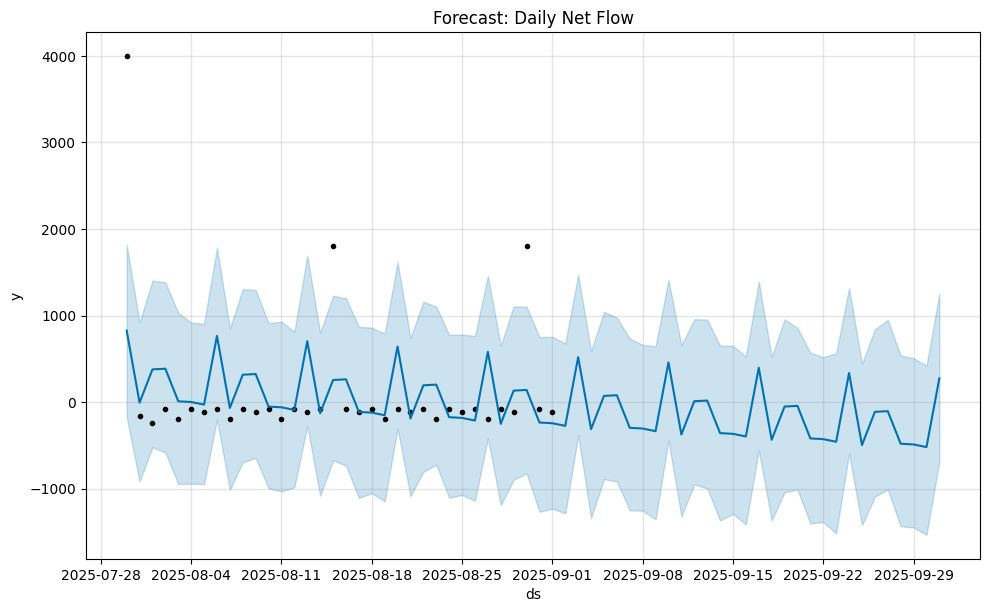

In [16]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Prophet model
m = Prophet(daily_seasonality=True, yearly_seasonality=False)
m.fit(daily)

# Forecast next 30 days
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

# Plot daily net flow forecast
fig = m.plot(forecast)
plt.title("Forecast: Daily Net Flow")
plt.show()


Balance stays positive in forecast horizon


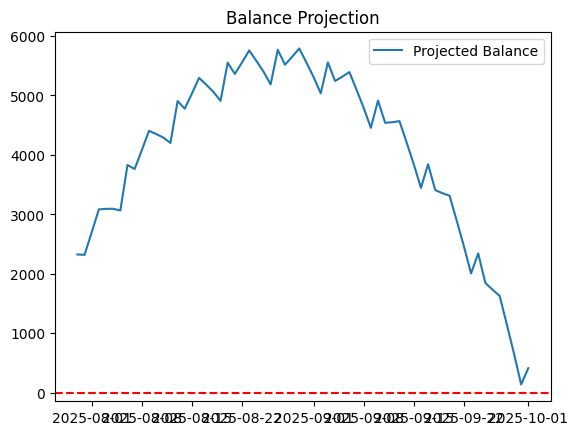

In [17]:
# Example current balance
current_balance = 1500  

# Add predicted net flow (yhat)
forecast["net_flow"] = forecast["yhat"]

# Project balance forward
forecast["balance"] = current_balance + forecast["net_flow"].Dcumsum()

# Find run-out date (balance <= 0)
runout = forecast[forecast["balance"] <= 0].head(1)
if not runout.empty:
    print("Estimated run out date:", runout["ds"].values[0])
else:
    print("Balance stays positive in forecast horizon")

# Plot balance projection
plt.plot(forecast["ds"], forecast["balance"], label="Projected Balance")
plt.axhline(0, color="red", linestyle="--")
plt.title("Balance Projection")
plt.legend()
plt.show()


In [18]:
# User savings goal (for the current month)
savings_goal = 500
goal_deadline = "2025-08-31"   # or end of current forecast month


In [19]:
# Balance at the deadline
deadline_balance = forecast.loc[forecast["ds"] == goal_deadline, "balance"].values

if len(deadline_balance) > 0:
    projected = deadline_balance[0]
    required = current_balance + savings_goal
    
    if projected >= required:
        print(f"✅ On track! Projected balance = {projected:.2f}, goal = {required:.2f}")
    else:
        print(f"⚠️ Off track! Projected balance = {projected:.2f}, goal = {required:.2f}")
else:
    print("⚠️ No forecast available for goal deadline")


✅ On track! Projected balance = 5554.65, goal = 2000.00


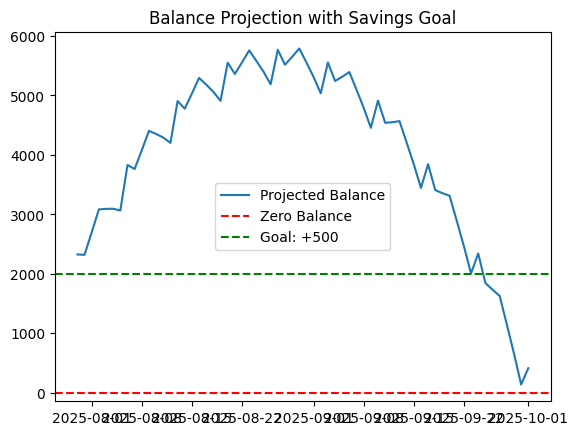

Progress: 810.9%


In [20]:
import matplotlib.pyplot as plt

plt.plot(forecast["ds"], forecast["balance"], label="Projected Balance")
plt.axhline(0, color="red", linestyle="--", label="Zero Balance")
plt.axhline(current_balance + savings_goal, color="green", linestyle="--", label=f"Goal: +{savings_goal}")
plt.title("Balance Projection with Savings Goal")
plt.legend()
plt.show()
progress = (projected - current_balance) / savings_goal * 100
print(f"Progress: {progress:.1f}%")
